In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Video Games Sales.csv')

In [3]:
data.head(5)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In this data.info(),it shows the data type of the each column like index,Rank are int64 type,Game Title,Platform,Genre,Publisher are object type,Year,North America,Europe,Japan,Rest of World,global,Review are float64 type

---



In [7]:
data.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In this data.describe(),it shows the each int64 and float64 types column's Statistical description like count,mean,std(Standard Deviation),min(Minimum),max(Maximum),percentile like 25%,50%,75% to know about how the columns vary between intervals

---


In [9]:
data.duplicated()
data.duplicated().sum()

0

*   Checking whether the dataset columns are filled with duplicate values

*   So,we know about we dont have any duplicated data's in the dataset





---

In [10]:
data.isna().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64



*   data.isna() helps to find whether the dataset contains any null values and it like bool values(True or False)
*   data.isna().sum() helps to sum the total number of null values present in each columns in int64
*   So dataset got 29 null values in Year column and 2 null values in Publisher column
*   So we need to check whether the null values affect the other rows and columns ,If not then we  can remove those rows or columns
*   But in our case it affect the other colums so we couldn't remove those columns and rows
*   So we can fill the null values with some other values




---







Objective of the analysis

1. Find the total reviews in each genre
2. Find top 5 genre which got maximum reviews
3. Find the Total Reviews By Each Year
4. Find the Publisher with Most titles
1. Total sales by region
2. FInd the maximum sales(all region) by year




**1. Finding the total reviews in each genre**

In [11]:
total_reviews = data.groupby('Genre', as_index=False)['Review'].sum()
total_reviews

,Genre,Review
0,Action,21712.27
1,Adventure,8962.82
2,Fighting,10358.29
3,Misc,11570.41
4,Platform,14736.23
5,Puzzle,3269.50
6,Racing,14527.60
7,Role-Playing,14517.02
8,Shooter,16702.44
9,Simulation,6790.69


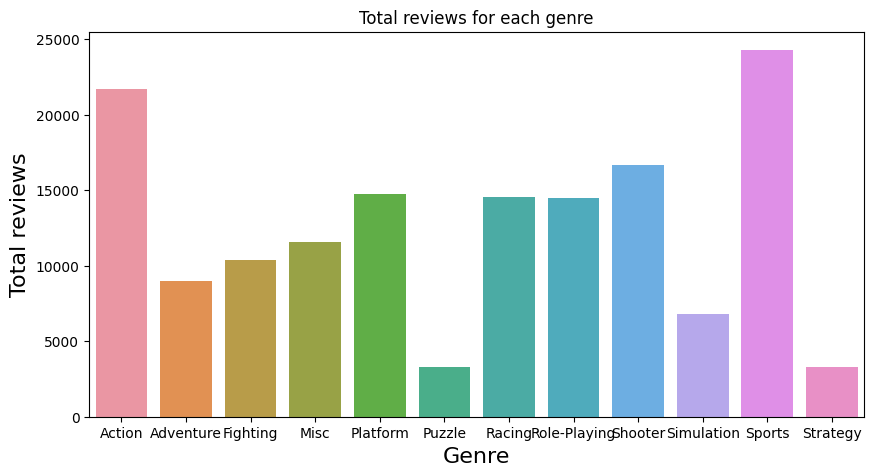

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=total_reviews, x='Genre', y='Review')
plt.title('Total reviews for each genre')
plt.xlabel ('Genre', fontsize=16)
plt.ylabel ('Total reviews', fontsize=16)
plt.show()

**2. Finding top 5 genre which got maximum reviews**

In [60]:
TopFiveGenere=data.groupby('Genre',as_index=False)['Review'].sum().sort_values(by='Review',ascending=False).reset_index()
TopFiveGenere.head(5)

,index,Genre,Review
0,10,Sports,24282.57
1,0,Action,21712.27
2,8,Shooter,16702.44
3,4,Platform,14736.23
4,6,Racing,14527.60


Here Sports genre got the maximum reviews of 24282.57

---



**3. Finding the Total Reviews By Each Year**

In [16]:
TotalReviewsByYear=data.groupby('Year',as_index=False)['Review'].sum()
TotalReviewsByYear

,Year,Review
0,1983.0,430.00
1,1984.0,646.70
2,1985.0,411.00
3,1986.0,897.00
4,1987.0,535.00
5,1988.0,759.00
6,1989.0,695.62
7,1990.0,1031.00
8,1991.0,805.00
9,1992.0,1664.16


here we got the total reviews by the each year,so then we can calculate the top 10 reviews by year

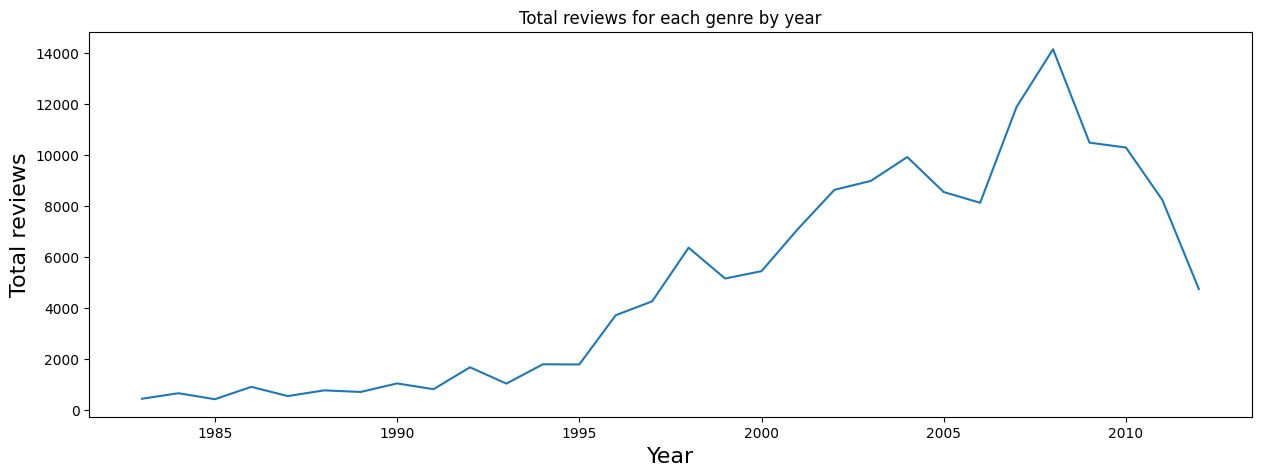

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(data=TotalReviewsByYear, x='Year', y='Review')
plt.title('Total reviews for each genre by year')
plt.xlabel ('Year', fontsize=16)
plt.ylabel ('Total reviews', fontsize=16)
plt.show()

In [29]:
TotalReviewsByYear.nlargest(10,'Review').reset_index()

,index,Year,Review
0,25,2008.0,14149.73
1,24,2007.0,11887.15
2,26,2009.0,10482.32
3,27,2010.0,10291.43
4,21,2004.0,9917.60
5,20,2003.0,8981.69
6,19,2002.0,8628.52
7,22,2005.0,8543.64
8,28,2011.0,8232.66
9,23,2006.0,8121.83


here we got the top 10 reviews by year.From this we can assume that the max no of games are sold in these years.And also we got 2008 has the most reviews so that we assume that max games were sold in 2008

In [63]:
MostPublishedByYear=data.groupby('Year')['Game Title'].count().sort_values(ascending=False).reset_index()
MostPublishedByYear.head()

,Year,Game Title
0,2008.0,184
1,2007.0,157
2,2009.0,131
3,2010.0,130
4,2004.0,122


As we assumed earlier ,In 2008,most games were sold

---



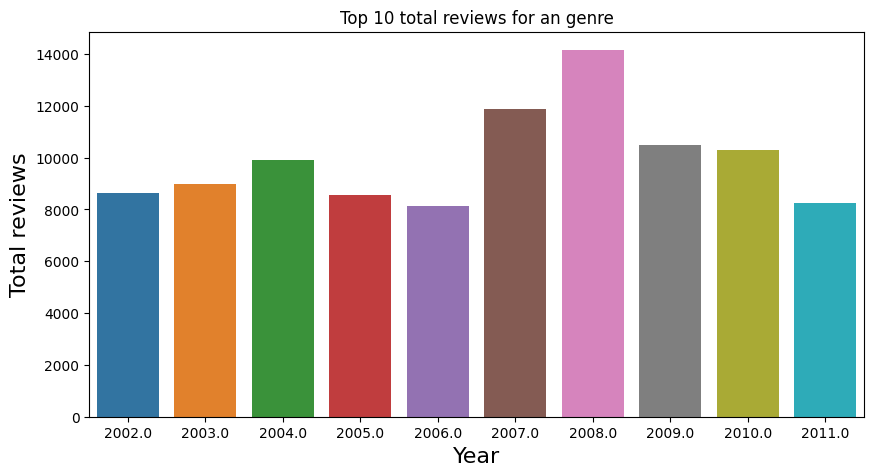

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=TotalReviewsByYear.nlargest(10,'Review'), x='Year', y='Review')
plt.title('Top 10 total reviews for an genre')
plt.xlabel ('Year', fontsize=16)
plt.ylabel ('Total reviews', fontsize=16)
plt.show()

**4. Finding the Publisher with Most titles**

In [40]:
MostPublished=data.groupby('Publisher')['Game Title'].count().sort_values(ascending=False).reset_index()
MostPublished.head()

,Publisher,Game Title
0,Electronic Arts,341
1,Nintendo,296
2,Sony Computer Entertainment,156
3,Activision,141
4,Ubisoft,93


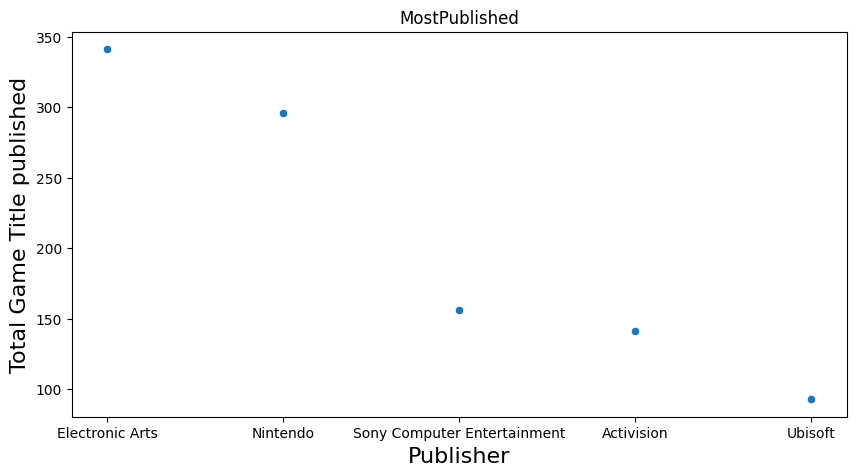

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=MostPublished.head(), x='Publisher', y='Game Title')
plt.title('MostPublished')
plt.xlabel ('Publisher', fontsize=16)
plt.ylabel ('Total Game Title published', fontsize=16)
plt.show()

From this we got Electronic Arts publisher sold 341 different games

---



In [45]:
MostPublishedByYear=data.groupby('Year')['Publisher'].count().sort_values(ascending=False).reset_index()
MostPublishedByYear.head()

,Year,Publisher
0,2008.0,184
1,2007.0,157
2,2009.0,131
3,2010.0,130
4,2004.0,122


In [62]:
MostPublishedByYear=data.groupby('Year')['Game Title'].count().sort_values(ascending=False).reset_index()
MostPublishedByYear.head()

,Year,Game Title
0,2008.0,184
1,2007.0,157
2,2009.0,131
3,2010.0,130
4,2004.0,122


**5. Find the maximum sales by region**

In [69]:
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [79]:
Total_sales_In_NorthAmerica=data.groupby('Genre')['North America'].sum().reset_index().sort_values(by='North America',ascending=False)
Total_sales_In_NorthAmerica

,Genre,North America
10,Sports,354.62
8,Shooter,333.40
0,Action,320.88
4,Platform,317.03
6,Racing,214.35
3,Misc,205.46
7,Role-Playing,197.54
2,Fighting,133.07
1,Adventure,116.83
9,Simulation,101.13


In [75]:
Total_sales_In_Europe=data.groupby('Genre')['Europe'].sum().reset_index().sort_values(by='Europe',ascending=False)
Total_sales_In_Europe

,Genre,Europe
10,Sports,221.09
0,Action,205.91
8,Shooter,155.89
6,Racing,151.62
4,Platform,139.54
3,Misc,131.48
7,Role-Playing,100.90
1,Adventure,76.88
9,Simulation,64.08
2,Fighting,63.49


In [77]:
Total_sales_In_Japan=data.groupby('Genre')['Japan'].sum().reset_index().sort_values(by='Japan',ascending=False)
Total_sales_In_Japan

,Genre,Japan
7,Role-Playing,169.32
4,Platform,104.17
10,Sports,56.47
3,Misc,50.78
0,Action,45.66
6,Racing,43.79
2,Fighting,34.01
1,Adventure,27.01
5,Puzzle,25.00
9,Simulation,24.31


In [80]:
Total_sales_In_RestofWorld=data.groupby('Genre')['Rest of World'].sum().reset_index().sort_values(by='Rest of World',ascending=False)
Total_sales_In_RestofWorld

,Genre,Rest of World
10,Sports,71.06
0,Action,64.87
8,Shooter,53.84
6,Racing,42.08
3,Misc,38.35
4,Platform,34.42
7,Role-Playing,28.53
1,Adventure,18.80
2,Fighting,18.44
9,Simulation,15.53




*   we got the max sales in North America 354 in sports genre
*   we got the max sales in Europe 221 in sports genre
*   we got the max sales in Japan 169 in Role-Playing genre
*   we got the max sales in Total_sales_In_RestofWorld 71 in sports genre



**6. Find the maximum sales(all region) by year**

In [67]:
Total_sales=data.groupby('Genre')['Global'].sum().reset_index()
Total_sales

,Genre,Global
0,Action,637.27
1,Adventure,239.45
2,Fighting,249.00
3,Misc,426.12
4,Platform,595.24
5,Puzzle,108.65
6,Racing,451.80
7,Role-Playing,496.20
8,Shooter,557.20
9,Simulation,205.14


In [88]:
Total_sales.sort_values('Global',ascending=False)

,Genre,Global
10,Sports,703.11
0,Action,637.27
4,Platform,595.24
8,Shooter,557.20
7,Role-Playing,496.20
6,Racing,451.80
3,Misc,426.12
2,Fighting,249.00
1,Adventure,239.45
9,Simulation,205.14


In [68]:
Total_sales['Global'].max()

703.11

In this we got the total sales of 703.11 was happend in the sports genre

---



**In global,Sports genre has the most hit and let see what games are there**

In [93]:
Total_sales=data.groupby('Game Title')['Global'].sum().reset_index().sort_values(by='Global',ascending=False)
Total_sales

,Game Title,Global
1456,Wii Sports,81.12
1193,Super Mario Bros.,40.24
1254,Tetris,35.84
630,Mario Kart Wii,33.55
1457,Wii Sports Resort,31.52
...,...,...
311,FIFA Soccer World Championship,0.83
266,Dynasty Warriors 2,0.83
574,Lizzie McGuire 2: Lizzie Diaries,0.83
1483,Xenoblade Chronicles,0.83


**Wii Sports(game name) has the most successfull hit across the global**

---

